A notebook to compare DockQ scores to mean pLDDT and mean PAE scores.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
# Set style and colors

plt.style.use('science')

# Get the hex codes for the colors so we can assign them to categories
pal = sns.color_palette('Set1')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[0], 'Two-Domain': pal[1], 'Autoinhibitory': pal[2], 'Full': pal[3], 'Clusters': pal[4]}
pal.as_hex()

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

In [3]:
# Load the data files

# Load pLDDT data
afaipl = pd.read_csv('./project_pipeline/data/af_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
afmdpl = pd.read_csv('./project_pipeline/data/af_multi_domain_pLDDT.tsv', sep='\t').astype('object')

# Load PAE data
afaipa = pd.read_csv('./project_pipeline/data/disorder.tsv', sep='\t').astype('object')
afmdpa = pd.read_csv('./project_pipeline/data/multi_domain_pae.tsv', sep='\t').astype('object')

# Load DockQ data
afaidq = pd.read_csv('./project_pipeline/data/ai_dockq_results.csv', sep=',').astype('object')
afmddq = pd.read_csv('./project_pipeline/data/md_dockq_results.csv').astype('object')

# Load classified data
cl = pd.read_csv('./project_pipeline/data/classified_files_3.tsv', sep='\t').astype('object')

# Drop nan values
afaidq = afaidq.dropna().reset_index(drop=True)

In [4]:
def plddt_vals(df):
    # Select necessary columns
    df = df[['uniprot', 'complex_mean_plddt']]

    # Rename columns
    df.columns = ['UniProt', 'pLDDT']

    # Set as float
    df['pLDDT'] = df['pLDDT'].astype(float)

    return df

def pae_vals(df):
    # Select necessary columns
    df = df[['uniprot', 'pdb', 'mean_pae_1_2']]

    # Rename columns
    df.columns = ['UniProt', 'PDB', 'PAE']

    # Set as float
    df['PAE'] = df['PAE'].astype(float)

    return df

def pae_vals2(df):
    # Select necessary columns
    df = df[['uniprot', 'mean_pae_1_2']]

    # Rename columns
    df.columns = ['UniProt', 'PAE']

    # Set as float
    df['PAE'] = df['PAE'].astype(float)

    return df

def dockq_vals(df):
    # Select necessary columns
    df = df[['uniprot', 'pdb', 'dockq']]

    # Rename columns
    df.columns = ['UniProt', 'PDB', 'DockQ']

    # Set as float
    df['DockQ'] = df['DockQ'].astype(float)

    return df

def classifieds(df):
    df = df[['uniprot', 'pdb', 'state', 'conformation']]

    # Rename columns
    df.columns = ['UniProt', 'PDB', 'State', 'Conformation']

    return df

In [5]:
# Prune and join the dataframes
afaipl_pruned = plddt_vals(afaipl)
afaipa_pruned = pae_vals(afaipa)
afaidq_pruned = dockq_vals(afaidq)
cl_pruned = classifieds(cl)

# Join the dataframes
# First join pae and dock on pdb
afai = pd.merge(afaipa_pruned, afaidq_pruned, on=['UniProt', 'PDB'])

# Then join the plddt data
afai = pd.merge(afai, afaipl_pruned, on='UniProt')

# Add the classification
afai = pd.merge(afai, cl_pruned, on=['UniProt', 'PDB'])

afai.head()

/tmp/ipykernel_3200579/968800247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pLDDT'] = df['pLDDT'].astype(float)
/tmp/ipykernel_3200579/968800247.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAE'] = df['PAE'].astype(float)
/tmp/ipykernel_3200579/968800247.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,UniProt,PDB,PAE,DockQ,pLDDT,State,Conformation
0,A0A0R4I961,6gtv,5.398,0.934,97.231,Active,Open
1,A0A0R4I961,6gtz,5.398,0.933,97.231,Active,Open
2,A0A0R4I961,6gu0,5.398,0.909,97.231,Active,Open
3,B5XAZ0,7bfk,3.130,0.626,91.488,Autoinhibited,Closed
4,B5XAZ0,7bfl,3.130,0.952,91.488,Autoinhibited,Closed


Text(0.5, 1.0, 'Autoinhibitory Proteins')

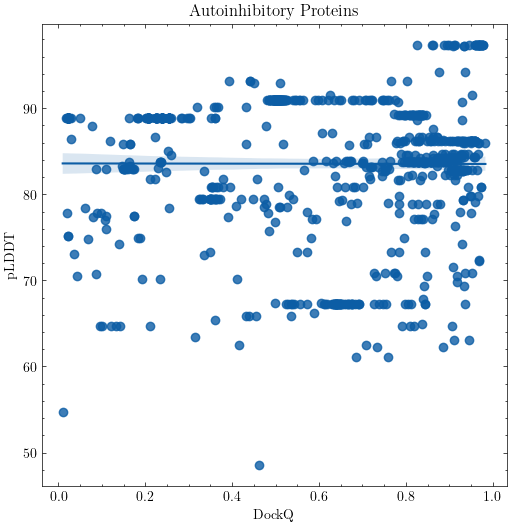

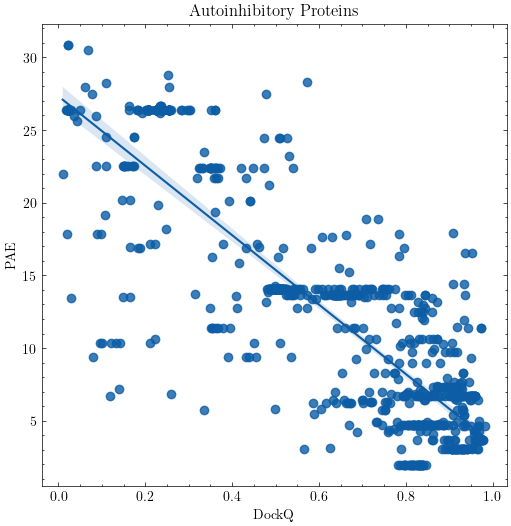

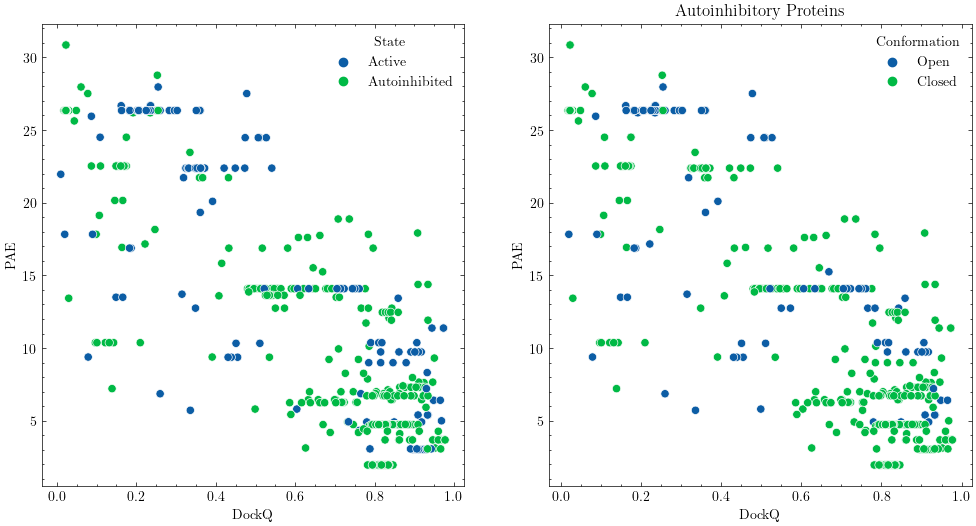

In [16]:
# Plot dockq vs pLDDT
plt.figure(figsize=(6, 6))

sns.regplot(data=afai, x='DockQ', y='pLDDT')
plt.xlabel('DockQ')
plt.ylabel('pLDDT')
plt.title('Autoinhibitory Proteins')

# Plot dockQ vs PAE
plt.figure(figsize=(6, 6))
sns.regplot(data=afai, x='DockQ', y='PAE')
plt.xlabel('DockQ')
plt.ylabel('PAE')
plt.title('Autoinhibitory Proteins')

# Plot dockQ vs PAE again, but color by state and conformation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=afai, x='DockQ', y='PAE', hue='State', ax=ax[0])
ax[0].set_xlabel('DockQ')
ax[0].set_ylabel('PAE')
plt.title('Autoinhibitory Proteins')

sns.scatterplot(data=afai, x='DockQ', y='PAE', hue='Conformation', ax=ax[1])
ax[1].set_xlabel('DockQ')
ax[1].set_ylabel('PAE')
plt.title('Autoinhibitory Proteins')

In [7]:
# Prune and join multi-domain dataframes
afmdpl_pruned = plddt_vals(afmdpl)
afmdpa_pruned = pae_vals2(afmdpa)
afmddq_pruned = dockq_vals(afmddq)

# Join the dataframes
# Join them all on uniprot
afmd = pd.merge(afmdpa_pruned, afmddq_pruned, on=['UniProt'])
afmd = pd.merge(afmd, afmdpl_pruned, on='UniProt')

afmd.head()

/tmp/ipykernel_3200579/968800247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pLDDT'] = df['pLDDT'].astype(float)
/tmp/ipykernel_3200579/968800247.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAE'] = df['PAE'].astype(float)
/tmp/ipykernel_3200579/968800247.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,UniProt,PAE,PDB,DockQ,pLDDT
0,Q72AS4,2.545,2wpn,0.893,92.43
1,Q72AS4,2.545,3ze6,0.895,92.43
2,Q72AS4,2.545,6z9o,0.983,92.43
3,Q72AS4,2.545,6z8j,0.976,92.43
4,Q72AS4,2.545,5jsk,0.911,92.43


Text(0.5, 1.0, 'Multi-Domain Proteins')

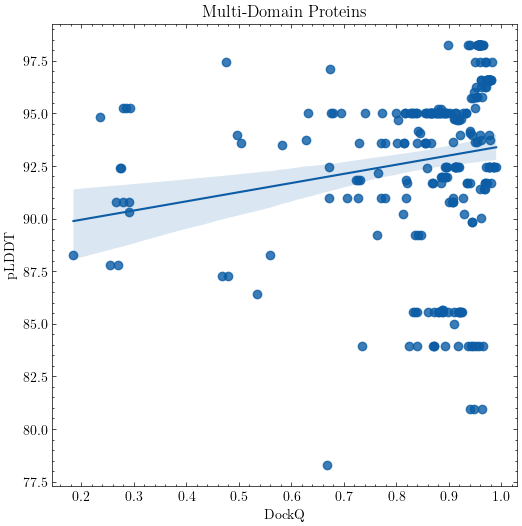

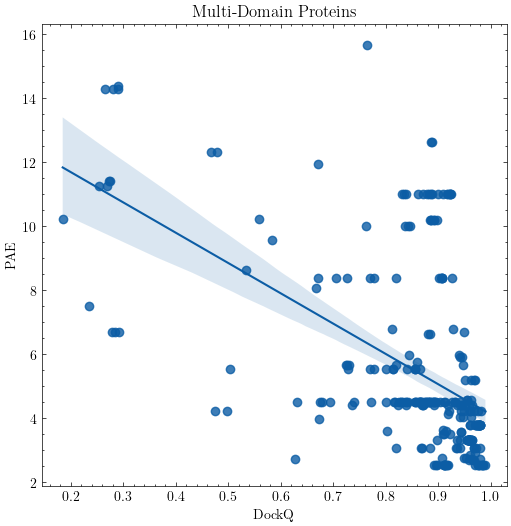

In [8]:
# Plot dockq vs pLDDT

plt.figure(figsize=(6, 6))
sns.regplot(data=afmd, x='DockQ', y='pLDDT')
plt.xlabel('DockQ')
plt.ylabel('pLDDT')
plt.title('Multi-Domain Proteins')

# Plot dockQ vs PAE
plt.figure(figsize=(6, 6))
sns.regplot(data=afmd, x='DockQ', y='PAE')
plt.xlabel('DockQ')
plt.ylabel('PAE')
plt.title('Multi-Domain Proteins')

